<a href="https://colab.research.google.com/github/kish-git/Test/blob/master/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Sparks Foundation**- Data Science and Business Analytics intern.
# **Task 1**: Prediction using Supervised ML.
# Problem Statement: What will be the predicted score if student studies for 9.25 hr/day.
## Name: **Kishor Raut**

In [44]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [45]:
# Reading data from remote link
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("........................................................................")
print("Data imported successfully :) ")
s_data.head(10)

........................................................................
Data imported successfully :) 


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


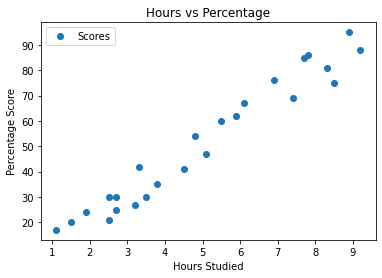

In [46]:
# Plotting the distribution of scores
s_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

### **Preparing the data**
The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [48]:
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values  

In [49]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [47]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 
print("........................................................................")
print("Training complete.")

........................................................................
Training complete.


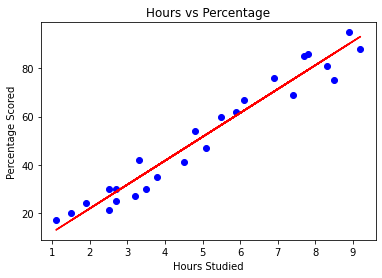

In [50]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Scored')  
# Plotting for the test data
plt.scatter(X, y, color='blue')
plt.plot(X, line, color='red');
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [51]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [52]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [53]:
# testing with different data
hours = 9.25
own_pred = round(regressor.predict([[9.25]])[0],2)
print("........................................................................")
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred))

........................................................................
No of Hours = 9.25
Predicted Score = 93.69


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [54]:
from sklearn import metrics  
print("........................................................................")
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

........................................................................
Mean Absolute Error: 4.183859899002982
